# **AMAZON SALES REPORT ANALYSIS**

**Installing needed packages**

In [1]:
pip install pandas


In [2]:
pip install seaborn

In [3]:
pip install matplotlib

**Importing Necessary Packages**

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re

## **Exploratory Data Analysis (EDA)**

 **1. Data Inspection**

Loading a CSV file into a DataFrame using pandas

In [8]:

df = pd.read_csv('Amazon Sales Report.csv', encoding='latin1')
df

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by,New,PendingS
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,T-shirt,S,On the Way,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,False,Easy Ship,NaN,NaN
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,3XL,Shipped,...,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,False,Easy Ship,NaN,NaN
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,...,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,True,NaN,NaN,NaN
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,Blazzer,L,On the Way,...,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,False,Easy Ship,NaN,NaN
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Trousers,3XL,Shipped,...,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,False,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128971,128970,406-6001380-7673107,05-31-22,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,...,INR,517.00,HYDERABAD,TELANGANA,500013.0,IN,False,NaN,NaN,NaN
128972,128971,402-9551604-7544318,05-31-22,Shipped,Amazon,Amazon.in,Expedited,T-shirt,M,Shipped,...,INR,999.00,GURUGRAM,HARYANA,122004.0,IN,False,NaN,NaN,NaN
128973,128972,407-9547469-3152358,05-31-22,Shipped,Amazon,Amazon.in,Expedited,Blazzer,XXL,Shipped,...,INR,690.00,HYDERABAD,TELANGANA,500049.0,IN,False,NaN,NaN,NaN
128974,128973,402-6184140-0545956,05-31-22,Shipped,Amazon,Amazon.in,Expedited,T-shirt,XS,Shipped,...,INR,1199.00,Halol,Gujarat,389350.0,IN,False,NaN,NaN,NaN


In [9]:
df.head()

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by,New,PendingS
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,T-shirt,S,On the Way,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,False,Easy Ship,NaN,NaN
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,3XL,Shipped,...,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,False,Easy Ship,NaN,NaN
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,...,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,True,NaN,NaN,NaN
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,Blazzer,L,On the Way,...,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,False,Easy Ship,NaN,NaN
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Trousers,3XL,Shipped,...,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,False,NaN,NaN,NaN


In [10]:
df.shape

(128976, 21)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128976 entries, 0 to 128975
Data columns (total 21 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   index               128976 non-null  int64  
 1   Order ID            128976 non-null  object 
 2   Date                128976 non-null  object 
 3   Status              128976 non-null  object 
 4   Fulfilment          128976 non-null  object 
 5   Sales Channel       128976 non-null  object 
 6   ship-service-level  128976 non-null  object 
 7   Category            128976 non-null  object 
 8   Size                128976 non-null  object 
 9   Courier Status      128976 non-null  object 
 10  Qty                 128976 non-null  int64  
 11  currency            121176 non-null  object 
 12  Amount              121176 non-null  float64
 13  ship-city           128941 non-null  object 
 14  ship-state          128941 non-null  object 
 15  ship-postal-code    128941 non-nul

**2. Summary Statistics**

In [12]:
df.describe()

,index,Qty,Amount,ship-postal-code,New,PendingS
count,128976.000000,128976.000000,121176.000000,128941.000000,0.0,0.0
mean,64486.130427,0.904401,648.562176,463945.677744,NaN,NaN
std,37232.897832,0.313368,281.185041,191458.488954,NaN,NaN
min,0.000000,0.000000,0.000000,110001.000000,NaN,NaN
25%,32242.750000,1.000000,449.000000,382421.000000,NaN,NaN
50%,64486.500000,1.000000,605.000000,500033.000000,NaN,NaN
75%,96730.250000,1.000000,788.000000,600024.000000,NaN,NaN
max,128974.000000,15.000000,5584.000000,989898.000000,NaN,NaN


In [13]:
df.describe(include='object')

,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,currency,ship-city,ship-state,ship-country,fulfilled-by
count,128976,128976,128976,128976,128976,128976,128976,128976,128976,121176,128941,128941,128941,39263
unique,120229,91,13,2,2,2,9,11,4,1,8948,69,1,1
top,403-4984515-8861958,05-03-2022,Shipped,Amazon,Amazon.in,Expedited,T-shirt,M,Shipped,INR,BENGALURU,MAHARASHTRA,IN,Easy Ship
freq,12,2085,77815,89713,128852,88630,50292,22373,109486,121176,11208,22272,128941,39263


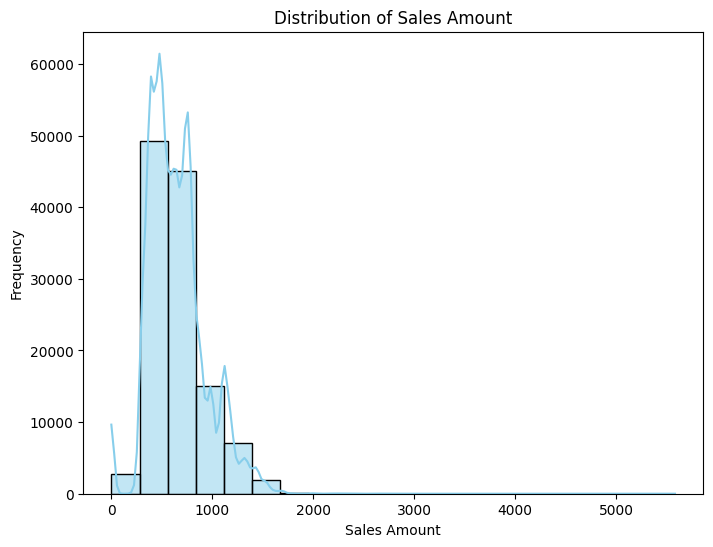

In [14]:

plt.figure(figsize=(8, 6))
sns.histplot(df['Amount'], bins=20, kde=True, color='skyblue')
plt.title("Distribution of Sales Amount")
plt.xlabel("Sales Amount")
plt.ylabel("Frequency")
plt.show()

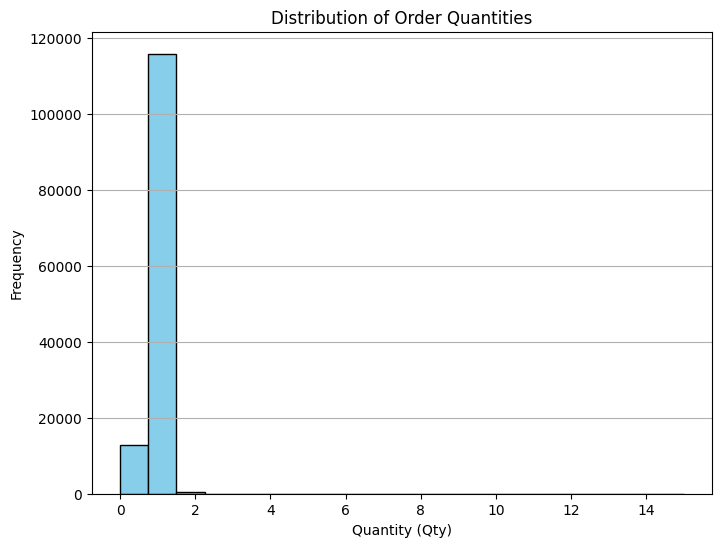

In [15]:
plt.figure(figsize=(8, 6))
plt.hist(df['Qty'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Quantity (Qty)')
plt.ylabel('Frequency')
plt.title('Distribution of Order Quantities')
plt.grid(axis='y')
plt.show()

<ipython-input-16-39b7fb81202a>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Status', palette='pastel')


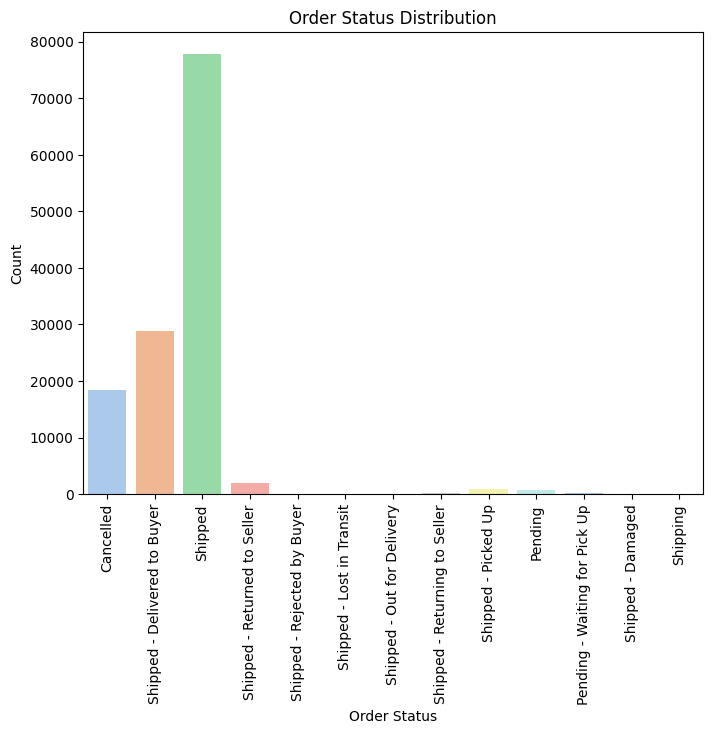

In [16]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Status', palette='pastel')
plt.xlabel('Order Status')
plt.ylabel('Count')
plt.title('Order Status Distribution')
plt.xticks(rotation=90)
plt.show()


## **Data Preprocessing**

**1. Handling Missing Values**

In [17]:
df.dropna(subset=['index'], inplace=True)
df['index'] = df['index'].astype(int)
df['Date'] = pd.to_datetime(df['Date'])
print(df.dtypes)


index                          int64
Order ID                      object
Date                  datetime64[ns]
Status                        object
Fulfilment                    object
Sales Channel                 object
ship-service-level            object
Category                      object
Size                          object
Courier Status                object
Qty                            int64
currency                      object
Amount                       float64
ship-city                     object
ship-state                    object
ship-postal-code             float64
ship-country                  object
B2B                             bool
fulfilled-by                  object
New                          float64
PendingS                     float64
dtype: object


<ipython-input-17-531f0e0d1098>:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'])


In [18]:
columns_with_missing_values = df.columns[df.isnull().any()].tolist() #checking missing values in the columns
print(columns_with_missing_values)

['Courier Status', 'currency', 'Amount', 'ship-city', 'ship-state', 'ship-postal-code', 'ship-country', 'promotion-ids', 'B2B', 'fulfilled-by', 'Unnamed: 22']

for col in columns_with_missing_values:
    if df[col].dtype == 'int64' or df[col].dtype == 'float64':#missing values are replaced with mean
        df[col].fillna(df[col].mean(), inplace=True)
    elif col == 'Courier Status':
        df['Courier Status'].fillna(df['Status'], inplace=True)
    else:
        df[col].fillna(df[col].mode().iloc[0], inplace=True)


print(df.isnull().sum()) # Verify that missing values


['currency', 'Amount', 'ship-city', 'ship-state', 'ship-postal-code', 'ship-country', 'fulfilled-by', 'New', 'PendingS']
index                      0
Order ID                   0
Date                       0
Status                     0
Fulfilment                 0
Sales Channel              0
ship-service-level         0
Category                   0
Size                       0
Courier Status             0
Qty                        0
currency                   0
Amount                     0
ship-city                  0
ship-state                 0
ship-postal-code           0
ship-country               0
B2B                        0
fulfilled-by               0
New                   128976
PendingS              128976
dtype: int64


**2.Outlier Detection and Treatment**

0         False
1         False
2         False
3         False
4         False
          ...  
128971    False
128972    False
128973    False
128974    False
128975    False
Length: 128976, dtype: bool
0         True
1         True
2         True
3         True
4         True
          ... 
128971    True
128972    True
128973    True
128974    True
128975    True
Length: 128976, dtype: bool
1220
(127756, 21)


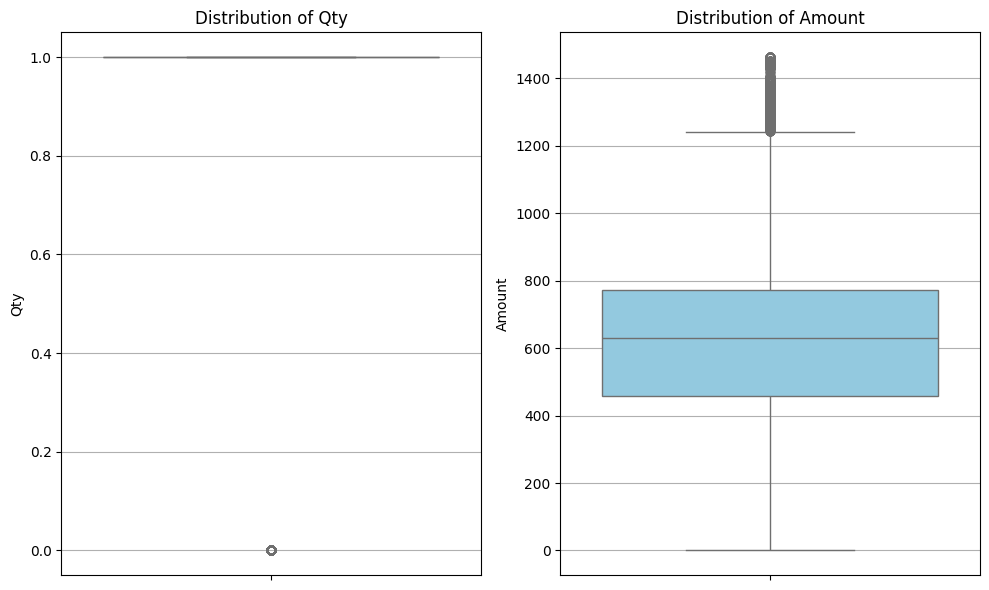

In [19]:
numerical_columns = ['Qty', 'Amount']
z_scores = pd.DataFrame() # Calculating z-scores for each numerical column
for col in numerical_columns:
    z_scores[col] = (df[col] - df[col].mean()) / df[col].std()
threshold = 3

# Identify outliers based on z-scores
outliers = (z_scores.abs() > threshold).any(axis=1)

# The rows that are false have no outlier
print(outliers)
print(~outliers)
print(outliers.sum())


df = df[~outliers] # Removing the rows that have outliers

# Verifying that outliers have been removed
print(df.shape)

# Visualizing them
plt.figure(figsize=(10, 6))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(1, len(numerical_columns), i)
    sns.boxplot(data=df, y=col, color='skyblue')
    plt.title(f'Distribution of {col}')
    plt.grid(axis='y')
plt.tight_layout()
plt.show()


688
(127068, 21)


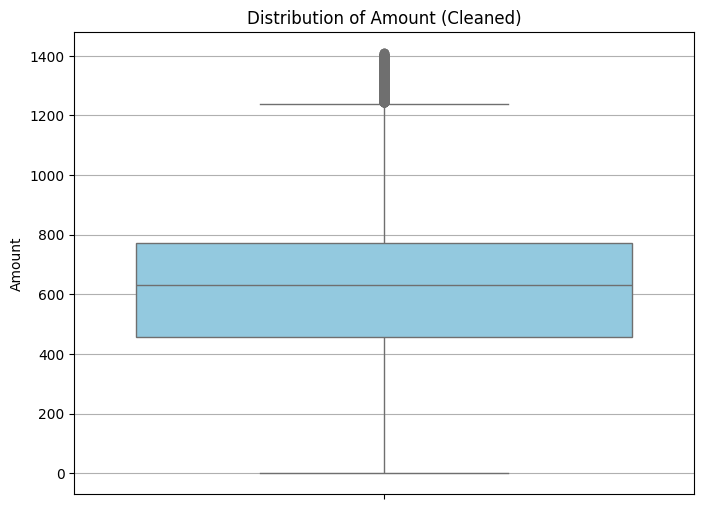

In [20]:
#remaining outliers are also get removed
z_scores_amount = (df['Amount'] - df['Amount'].mean()) / df['Amount'].std()

threshold_amount = 3

# Identify outliers based on updated z-scores
outliers_amount = (z_scores_amount.abs() > threshold_amount)

# Remove rows with outliers
df = df[~outliers_amount]

# Verifying that remaining outliers have been removed
print(outliers_amount.sum())
print(df.shape)


# Visualizing the distribution
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, y='Amount', color='skyblue')
plt.title("Distribution of Amount (Cleaned)")
plt.ylabel("Amount")
plt.grid(axis='y')
plt.show()


## **Data Visualization**

**1. Using Matplotlib and Seaborn**

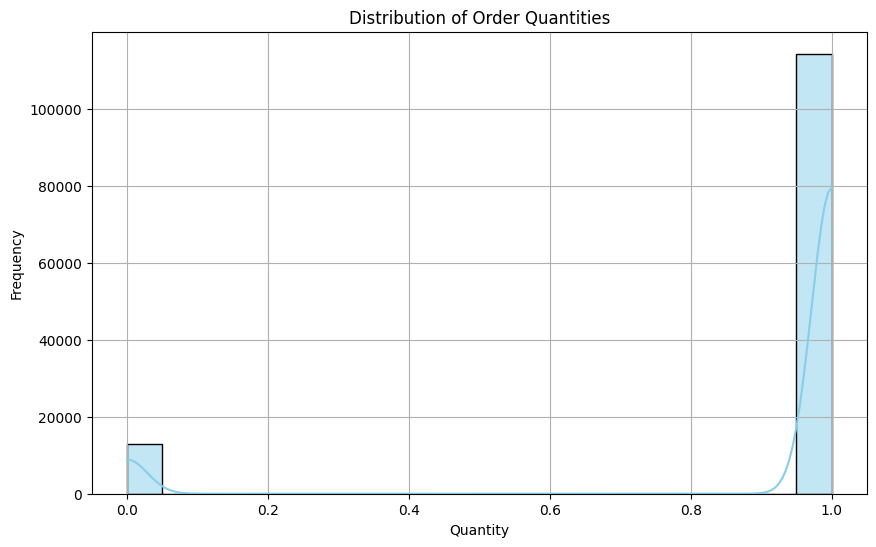

In [21]:

# Visualizing the distribution of quantity
plt.figure(figsize=(10, 6))
sns.histplot(df['Qty'], bins=20, kde=True, color='skyblue')
plt.title("Distribution of Order Quantities")
plt.xlabel("Quantity")
plt.ylabel("Frequency")
plt.grid()
plt.show()

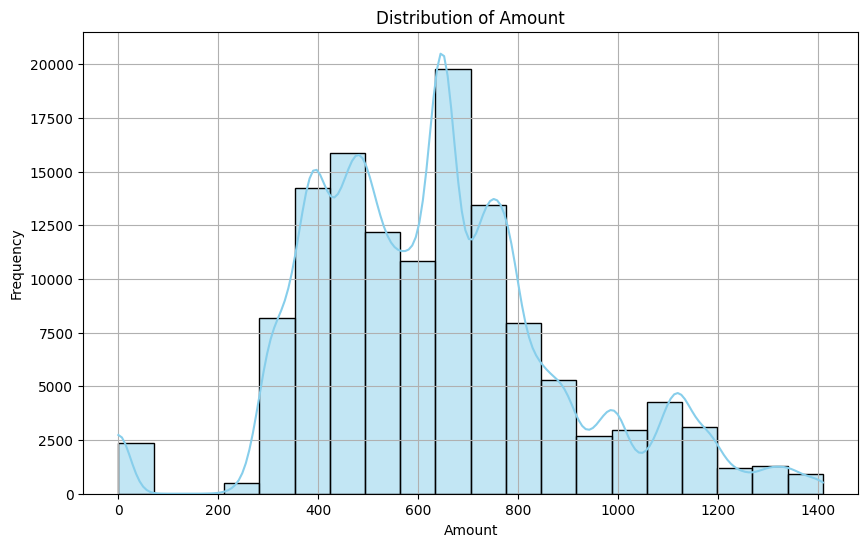

In [22]:
# Visualizing the distribution of sales
plt.figure(figsize=(10, 6))
sns.histplot(df['Amount'], bins=20, kde=True, color='skyblue')
plt.title("Distribution of Amount")
plt.xlabel("Amount")
plt.ylabel("Frequency")
plt.grid()
plt.show()


<ipython-input-23-0bd79ec10f67>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Category', palette='Set3')


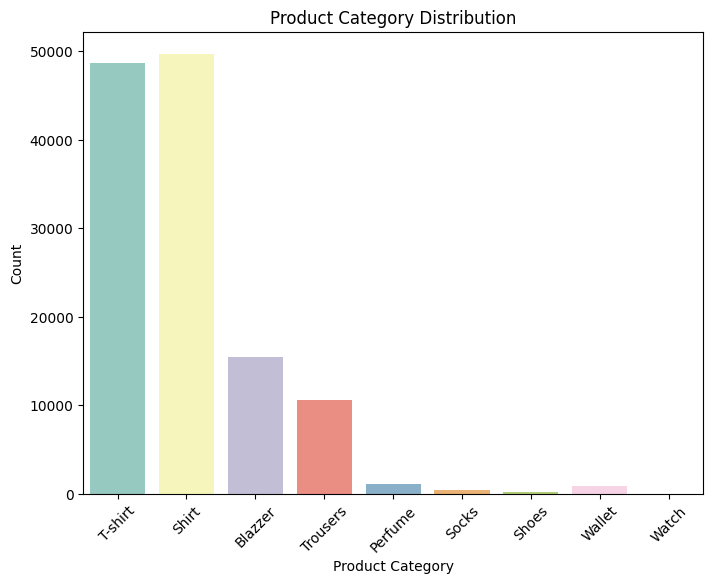

In [23]:

# Visualizing the distribution of product category
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Category', palette='Set3')
plt.title("Product Category Distribution")
plt.xlabel("Product Category")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

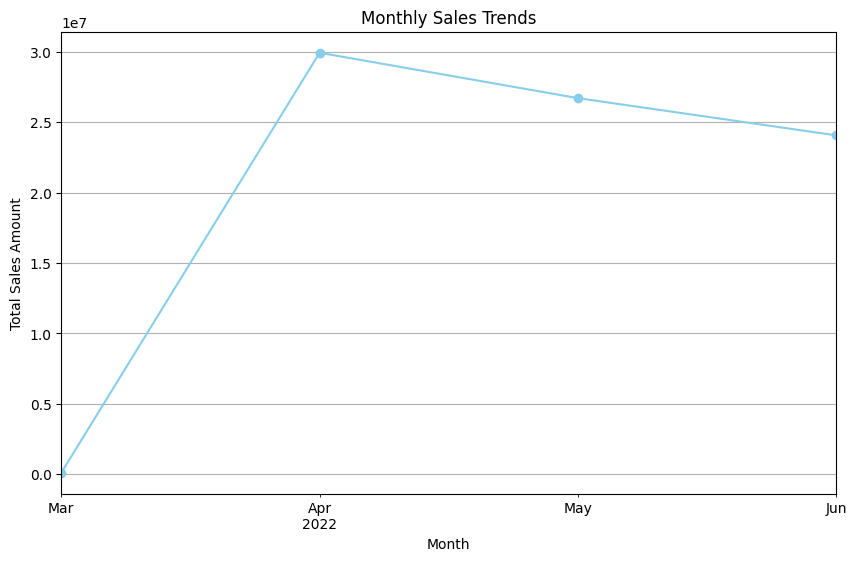

In [24]:
# Visualizing Sales Trends Over Time (Monthly Sales Trends)
monthly_sales = df.groupby(df['Date'].dt.to_period('M'))['Amount'].sum()

plt.figure(figsize=(10, 6))
monthly_sales.plot(kind='line', marker='o', color='skyblue')
plt.title("Monthly Sales Trends")
plt.xlabel("Month")
plt.ylabel("Total Sales Amount")
plt.grid()
plt.show()

**2. Visual Analysis**

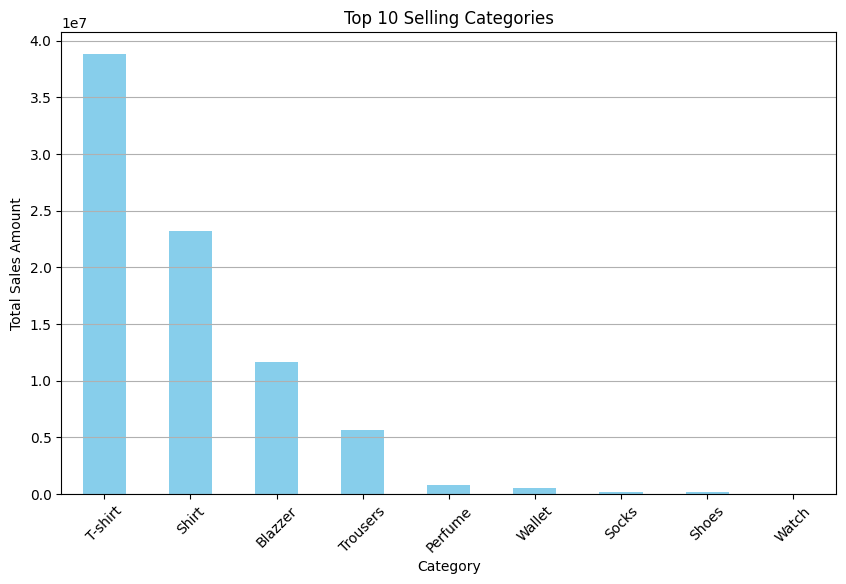

In [25]:
# Top-Selling product categories
top_selling_categories = df.groupby('Category')['Amount'].sum().nlargest(10)

plt.figure(figsize=(10, 6))
top_selling_categories.plot(kind='bar', color='skyblue')
plt.title("Top 10 Selling Categories")
plt.xlabel("Category")
plt.ylabel("Total Sales Amount")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

<ipython-input-26-3ed8af190282>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_5_states.index, y=top_5_states.values, palette='Set3')


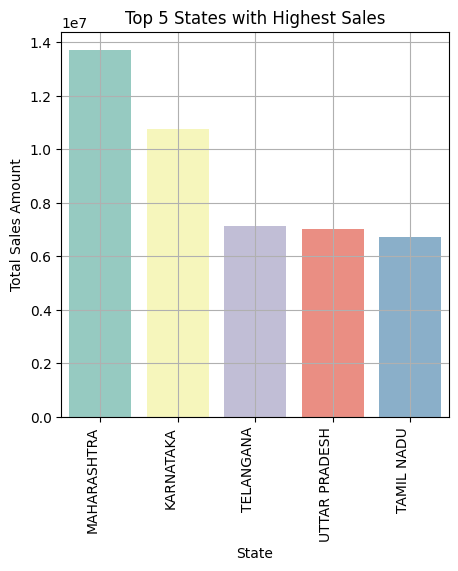

In [26]:
# Group the data by 'ship-state' and calculating the total sales
sales_by_state = df.groupby('ship-state')['Amount'].sum()

# Sorting the data by total sales in descending order
sales_by_state = sales_by_state.sort_values(ascending=False)

# Getting the top 5 states with the highest sales (sorted)
top_5_states = sales_by_state.sort_values(ascending=False).head(5)

# Creating a bar chart to visualize the regional sales distribution (top 5 states)
plt.figure(figsize=(5, 5))
sns.barplot(x=top_5_states.index, y=top_5_states.values, palette='Set3')
plt.title('Top 5 States with Highest Sales')
plt.xlabel('State')
plt.ylabel('Total Sales Amount')
plt.xticks(rotation=90, ha='right')
plt.grid()
plt.show()

In [27]:
df.columns

Index(['index', 'Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel',
       'ship-service-level', 'Category', 'Size', 'Courier Status', 'Qty',
       'currency', 'Amount', 'ship-city', 'ship-state', 'ship-postal-code',
       'ship-country', 'B2B', 'fulfilled-by', 'New', 'PendingS'],
      dtype='object')

## **Predictive Modeling**

**1. Building Predictive Models**

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
import warnings
warnings.filterwarnings("ignore")

# Feature selection
X = df[[ 'ship-service-level', 'Category', 'Size', 'Qty', 'Amount']]
y = df['Status']

# Convert categorical features to numerical using one-hot encoding
X_encoded = pd.get_dummies(X, drop_first=True)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Initializing and train the logistic regression model
LR = LogisticRegression()
LR.fit(X_train, y_train)

# Make predictions
y_pred_LR = LR.predict(X_test)

In [29]:

from sklearn.tree import DecisionTreeClassifier
warnings.filterwarnings("ignore")

# Initialize and train the decision tree classifier
DT = DecisionTreeClassifier(max_depth=5)
DT.fit(X_train, y_train)

# Make predictions
y_pred_DT = DT.predict(X_test)


from sklearn.ensemble import RandomForestClassifier
warnings.filterwarnings("ignore")

# Initialize and train the random forest classifier
RF = RandomForestClassifier(n_estimators=100, random_state=42)
RF.fit(X_train, y_train)

# Make predictions
y_pred_RF = RF.predict(X_test)

**2. Model Evaluation**

In [30]:
warnings.filterwarnings("ignore")

# Evaluate model performance
print("Logistic Regression Metrics:")
print("Accuracy:", accuracy_score(y_test, y_pred_LR))
print("Precision:", precision_score(y_test, y_pred_LR, average='weighted'))
print("Recall:", recall_score(y_test, y_pred_LR, average='weighted'))
print("F1-score:", f1_score(y_test, y_pred_LR, average='weighted'))
print("\nClassification Report:\n", classification_report(y_test, y_pred_LR))

print("Decision Tree Metrics:")
print("Accuracy:", accuracy_score(y_test, y_pred_DT))
print("Precision:", precision_score(y_test, y_pred_DT, average='weighted'))
print("Recall:", recall_score(y_test, y_pred_DT, average='weighted'))
print("F1-score:", f1_score(y_test, y_pred_DT, average='weighted'))
print("\nClassification Report:\n", classification_report(y_test, y_pred_DT))

print("Random Forest Metrics:")
print("Accuracy:", accuracy_score(y_test, y_pred_RF))
print("Precision:", precision_score(y_test, y_pred_RF, average='weighted'))
print("Recall:", recall_score(y_test, y_pred_RF, average='weighted'))
print("F1-score:", f1_score(y_test, y_pred_RF, average='weighted'))
print("\nClassification Report:\n", classification_report(y_test, y_pred_RF))


Logistic Regression Metrics:
Accuracy: 0.850476115526875
Precision: 0.8449333335643396
Recall: 0.850476115526875
F1-score: 0.809503660424628

Classification Report:
                                precision    recall  f1-score   support

                    Cancelled       0.99      0.24      0.39      3659
                      Pending       0.00      0.00      0.00       124
Pending - Waiting for Pick Up       0.00      0.00      0.00        58
                      Shipped       0.90      0.99      0.94     15183
 Shipped - Delivered to Buyer       0.74      1.00      0.85      5762
    Shipped - Lost in Transit       0.00      0.00      0.00         1
   Shipped - Out for Delivery       0.00      0.00      0.00         8
          Shipped - Picked Up       0.00      0.00      0.00       212
  Shipped - Rejected by Buyer       0.00      0.00      0.00         4
 Shipped - Returned to Seller       0.00      0.00      0.00       369
Shipped - Returning to Seller       0.00      0.00  

In [31]:
from sklearn.model_selection import cross_validate
warnings.filterwarnings("ignore")

# Performing cross-validation for each model
models = [LR, DT, RF]
model_names = ['Logistic Regression', 'Decision Tree', 'Random Forest']

for model, name in zip(models, model_names):
    scoring = ['precision_macro', 'recall_macro']
    scores = cross_validate(model, X_encoded, y, scoring=scoring, cv=5)
    print(f"{name} - Precision (macro):", scores['test_precision_macro'])
    print(f"{name} - Recall (macro):", scores['test_recall_macro'])
    print("\n")

Logistic Regression - Precision (macro): [0.21551214 0.21634628 0.2169925  0.21606598 0.19288704]
Logistic Regression - Recall (macro): [0.18228913 0.1685978  0.18358375 0.16759126 0.16936828]


Decision Tree - Precision (macro): [0.23318973 0.23258321 0.23318861 0.23217474 0.21460243]
Decision Tree - Recall (macro): [0.22554291 0.2210546  0.22540289 0.22117885 0.2023001 ]


Random Forest - Precision (macro): [0.28827403 0.22236681 0.32634199 0.32585352 0.2190488 ]
Random Forest - Recall (macro): [0.22739489 0.20363039 0.23789988 0.23454403 0.19994285]


